In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## 
from variation_build import driver_mean as dm 
from variation_build import driver_st_dev as st
##
from TyreDegCalcsQD import soft_driver_poly as sdp
from TyreDegCalcsQD import med_driver_poly as mdp
from TyreDegCalcsQD import hard_driver_poly as hdp

## brazil 
lewis_actual = pd.read_csv("lewis_brazil.csv")

In [3]:
times = []
laps = [] 

for i in range(45, 65):
    tyre_life_perc = ((i/71)*100)
    fuel_burn = 0.041
    laps_remain = (71-i)
    driver_var = (np.random.normal(dm[44],st[44])
    td = np.polyval(mdp[44], tyre_life_perc)
    fbc = (fuel_burn*laps_remain)
    lap = i
    proj = 67.93 + td + driver_var + fbc + 0.62
    laps.append(lap)
    times.append(proj)
    

plt.plot(laps, times)

    

SyntaxError: invalid syntax (2550170365.py, line 9)

In [95]:
(np.random.normal(0, st[44],1000)).mean()

-0.010617953223646759

In [13]:
def simulate_lap(DriverNumber, quali_tm, current_lap, end_lap, total_lap, current_tyre_age, compound):
    proj_lt = []
    lap_numb = []
    for lap in range(current_lap, end_lap):
        for s in range(0,2500):
            projections = []
            tyre_life_perc = (current_tyre_age/total_lap)*100
            fuel_burn = 0.041
            laps_remain = (current_lap/total_lap)
            fbc = ((fuel_burn*laps_remain) + 0.62)
            driver_var = (np.random.normal(dm[DriverNumber], st[DriverNumber]))
            tyre_deg_const = None
            if compound == 'SOFT':
                tyre_deg_const = np.polyval(sdp[DriverNumber], tyre_life_perc)
            elif compound == 'MEDIUM':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            elif compound == 'HARD':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            else:
                tyre_deg_const = 0
            lt = quali_tm + fbc + tyre_deg_const + driver_var
            projections.append(lt)
            s = s + 1
        current_tyre_age = current_tyre_age + 1
        proj_lt.append(np.array(projections).mean())
        lap_numb.append(lap)     
    return [proj_lt, lap_numb]

sim = simulate_lap(44, 67.93, 2, 71, 71, 3, 'HARD')


x1 = lewis_actual["LapNumber"]
y1 = lewis_actual["Seconds"]
plt.plot(x1, y1)
plt.plot(sim[1],sim[0])


IndentationError: expected an indented block (1768296058.py, line 2)

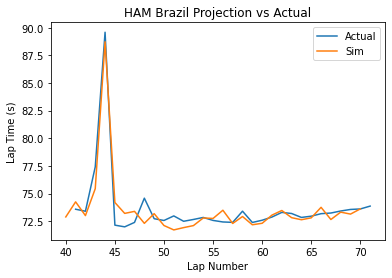

In [38]:
def simulate_stint(DriverNumber, quali_tm, current_lap, end_lap, total_lap, pit_lap, start_compound, current_tyre_age, change_compound, change_tyre_age):
    proj_lt = []
    lap_numb = []
    
    ## for each lap
    for lap in range(current_lap, end_lap):
        ## perform 2500 sims of each lap, take mean
        for s in range(0,2500):
            projections = []
            tyre_life_perc = (current_tyre_age/total_lap)*100
            fuel_burn = 0.041
            laps_remain = (current_lap/total_lap)
            fbc = ((fuel_burn*laps_remain) + 0.62)
            driver_var = (np.random.normal(dm[DriverNumber], st[DriverNumber]))
            in_lap = 4
            out_lap = 16
            tyre_deg_const = None
            compound = start_compound
            if compound == 'SOFT':
                tyre_deg_const = np.polyval(sdp[DriverNumber], tyre_life_perc)
            elif compound == 'MEDIUM':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            elif compound == 'HARD':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            else:
                tyre_deg_const = 0
            if lap == pit_lap:
                lt = quali_tm + fbc + tyre_deg_const + driver_var + in_lap
            elif lap == (pit_lap + 1):
                lt = quali_tm + fbc + tyre_deg_const + driver_var + out_lap
                compound = change_compound
            else:
                lt = quali_tm + fbc + tyre_deg_const + driver_var
            projections.append(lt)
            s = s + 1
        current_tyre_age = current_tyre_age + 1
        ## 
        
        proj_lt.append(np.array(projections).mean())
        lap_numb.append(lap)     
    
    return [proj_lt, lap_numb]

sim = simulate_stint(44, 67.93, 40, 71, 71, 43, "HARD", 3, "HARD", 2)

lewis_s = lewis_actual[lewis_actual["LapNumber"]>40]
x1 = lewis_s["LapNumber"]
y1 = lewis_s["Seconds"]
plt.plot(x1, y1, label='Actual')
plt.plot(sim[1],sim[0], label='Sim')
plt.ylabel('Lap Time (s)')
plt.xlabel('Lap Number')
plt.title('HAM Brazil Projection vs Actual')
plt.legend()

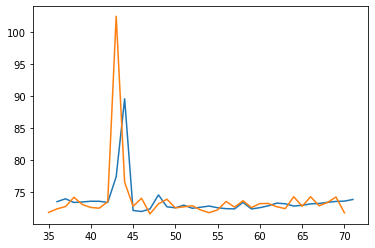

In [32]:
def simulate_stint(DriverNumber, quali_tm, current_lap, end_lap, total_lap, pit_lap, start_compound, current_tyre_age, change_compound, change_tyre_age):
    proj_lt = []
    lap_numb = []
    
    ## for each lap
    for lap in range(current_lap, end_lap):
        ## perform 2500 sims of each lap, take mean
        for s in range(0,2500):
            projections = []
            tyre_life_perc = (current_tyre_age/total_lap)*100
            fuel_burn = 0.041
            laps_remain = (current_lap/total_lap)
            fbc = ((fuel_burn*laps_remain) + 0.62)
            driver_var = (np.random.normal(dm[DriverNumber], st[DriverNumber]))
            out_lap = 4
            in_lap = 30
            tyre_deg_const = None
            compound = start_compound
            if compound == 'SOFT':
                tyre_deg_const = np.polyval(sdp[DriverNumber], tyre_life_perc)
            elif compound == 'MEDIUM':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            elif compound == 'HARD':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            else:
                tyre_deg_const = 0
            if lap == pit_lap:
                lt = quali_tm + fbc + tyre_deg_const + driver_var + in_lap
            elif lap == (pit_lap + 1):
                lt = quali_tm + fbc + tyre_deg_const + driver_var + out_lap
                compound = change_compound
            else:
                lt = quali_tm + fbc + tyre_deg_const + driver_var
            projections.append(lt)
            s = s + 1
        current_tyre_age = current_tyre_age + 1
        ## 
        
        proj_lt.append(np.array(projections).mean())
        lap_numb.append(lap)     
    
    return [proj_lt, lap_numb]

sim = simulate_stint(44, 67.93, 35, 71, 71, 43, "HARD", 3, "HARD", 2)

lewis_s = lewis_actual[lewis_actual["LapNumber"]>35]
x1 = lewis_s["LapNumber"]
y1 = lewis_s["Seconds"]
plt.plot(x1, y1)
plt.plot(sim[1],sim[0])


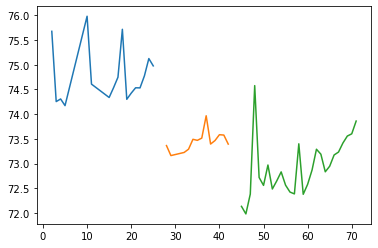

In [31]:
## Actual Lap Times Stint 1
lewis_s1 = lewis_actual[lewis_actual["Stint"]==1]
x = lewis_s1["LapNumber"]
y = lewis_s1["Seconds"]
plt.plot(x, y)


## Actual Lap Times Stint 2
lewis_s2 = lewis_actual[lewis_actual["Stint"]==2]
x2 = lewis_s2["LapNumber"]
y2 = lewis_s2["Seconds"]
plt.plot(x2, y2)

## Actual Lap Times Stint 3
lewis_s3 = lewis_actual[lewis_actual["Stint"]==3]
x3 = lewis_s3["LapNumber"]
y3 = lewis_s3["Seconds"]
plt.plot(x3, y3)

In [32]:
## Overlay

In [12]:
class Driver:
    """create driver"""
    def __init__(self, drivernumber, quali_tm, position)

class Race:
    """create race"""
    def __init__(self, total_laps, pit_in, pit_out, positions, gaps, total_race_times, base_times):
        """
        input parameters: total laps of race, pit in time addition, pit out time addition
        """
        self._total_laps = total_laps
        self._pit_in = pit_in
        self._pit_out = pit_out
        self._position = positions
        self._gaps = gaps
        self._total_race_times = total_race_times
        self._base_times = base_times
    
    def get_total_laps(self):
        return self._total_laps
    
    def get_pit_in(self):
        return self._pit_in
    
    def get_pit_out(self):
        return self._pit_out
    
    def get_positions(self):
        return self._position
    
    def get_gaps(self):
        return self._gaps
    
    def get_trt(self):
        return self._total_race_times
    
    def get_base_times(self):
        return self._base_times
    
    def simulate_stint(DriverNumber, current_lap, end_lap, pit_lap, start_compound, current_tyre_age, change_compound, change_tyre_age):
    proj_lt = []
    lap_numb = []
    for lap in range(current_lap, end_lap):
        for s in range(0,2500):
            projections = []
            tyre_life_perc = (current_tyre_age/total_lap)*100
            laps_remain = (current_lap/total_lap)
            fbc = ((0.041*laps_remain) + 0.62)
            driver_var = (np.random.normal(dm[DriverNumber], st[DriverNumber]))
            out_lap = 4
            in_lap = 16
            tyre_deg_const = None
            compound = start_compound
            if compound == 'SOFT':
                tyre_deg_const = np.polyval(sdp[DriverNumber], tyre_life_perc)
            elif compound == 'MEDIUM':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            elif compound == 'HARD':
                tyre_deg_const = np.polyval(mdp[DriverNumber], tyre_life_perc)
            else:
                tyre_deg_const = 0
            if lap == pit_lap:
                lt = quali_tm + fbc + tyre_deg_const + driver_var + in_lap
            elif lap == (pit_lap + 1):
                lt = quali_tm + fbc + tyre_deg_const + driver_var + out_lap
                compound = change_compound
            else:
                lt = quali_tm + fbc + tyre_deg_const + driver_var
            projections.append(lt)
            s = s + 1
        current_tyre_age = current_tyre_age + 1
        proj_lt.append(np.array(projections).mean())
        lap_numb.append(lap)     
    return [proj_lt, lap_numb]
            

        
brazil = Race(71, 4, 18, {1:33, 2:44, 3:77, 4:11}, {1:"LEAD", 2:0.4, 3:0.8, 4:1.1}, {1:120, 2:121, 3:122, 4:124})
print(brazil.get_positions())

{1: 33, 2: 44, 3: 77, 4: 11}
